In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Credit Card Dataset.csv')
data.shape

(8950, 18)

In [4]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [7]:
stat_df = pd.DataFrame(data.mean(),index=data.columns,columns=['mean'])
stat_df['median']= data.median()
stat_df['max'] = data.max()
stat_df['min'] = data.min()
stat_df 

,mean,median,max,min
CUST_ID,NaN,NaN,C19190,C10001
BALANCE,1564.474828,873.385231,19043.1,0
BALANCE_FREQUENCY,0.877271,1.000000,1,0
PURCHASES,1003.204834,361.280000,49039.6,0
ONEOFF_PURCHASES,592.437371,38.000000,40761.2,0
INSTALLMENTS_PURCHASES,411.067645,89.000000,22500,0
CASH_ADVANCE,978.871112,0.000000,47137.2,0
PURCHASES_FREQUENCY,0.490351,0.500000,1,0
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.083333,1,0
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.166667,1,0


In [8]:
data = data.fillna(data.median())

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

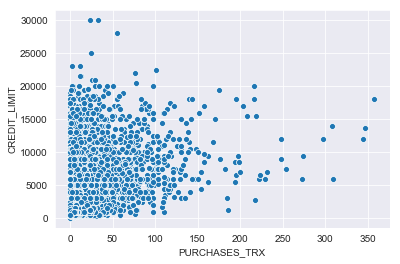

In [10]:
sns.scatterplot('PURCHASES_TRX','CREDIT_LIMIT',data = data)

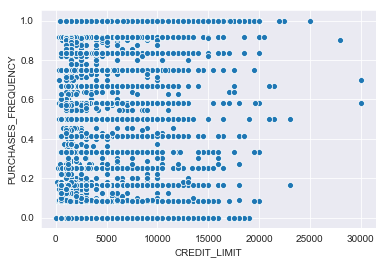

In [11]:
sns.scatterplot('CREDIT_LIMIT','PURCHASES_FREQUENCY',data = data)

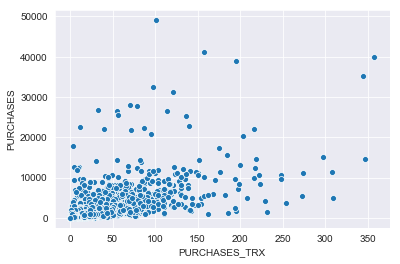

In [12]:
sns.scatterplot('PURCHASES_TRX','PURCHASES',data = data)

## Forming clusters using 6 features mentioned below

In [13]:
cols = ["BALANCE", "PURCHASES_TRX", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]
model_data = data[cols]

In [14]:
model_data.head()

,BALANCE,PURCHASES_TRX,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,40.900749,2,0.000000,1000.0,201.802084,139.509787
1,3202.467416,0,6442.945483,7000.0,4103.032597,1072.340217
2,2495.148862,12,0.000000,7500.0,622.066742,627.284787
3,1666.670542,1,205.788017,7500.0,0.000000,312.343947
4,817.714335,1,0.000000,1200.0,678.334763,244.791237


In [15]:
inertia = []
for i in range(1,15):
    model = KMeans(n_clusters=i)
    model.fit(model_data)
    inertia.append(model.inertia_)

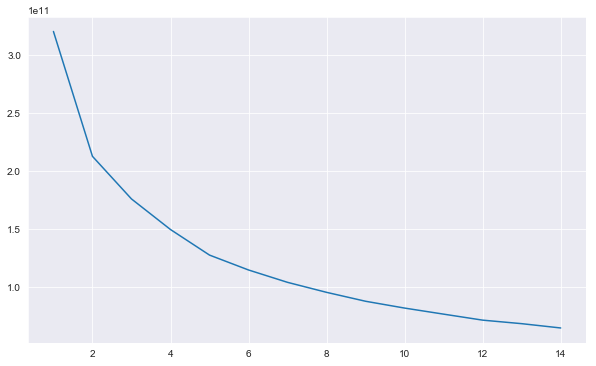

In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),inertia)

In [17]:
model=KMeans(n_clusters=7)
pred=model.fit_predict(model_data)

In [18]:
model_data['Cluster']=pred

In [19]:
mean_df = model_data.groupby('Cluster').mean()
mean_df

,BALANCE,PURCHASES_TRX,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
Cluster,,,,,,
0,1326.430057,23.646847,389.857218,11866.486486,2073.022425,440.638210
1,741.552118,9.539132,422.643009,2044.703895,850.943985,493.942231
2,7188.728750,20.314991,3739.375988,10512.903226,2405.058431,2506.895803
3,5633.097980,62.892308,8867.921654,13746.153846,24533.828057,3059.455401
4,3174.424419,32.603175,4608.318863,7763.900914,8555.146464,1252.163143
5,1697.445034,18.184324,891.800780,5904.717067,1670.710235,670.351761
6,4058.147688,18.625000,922.757849,4267.857143,1624.939144,22760.031552


In [20]:
median_df = model_data.groupby('Cluster').median()
median_df

,BALANCE,PURCHASES_TRX,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
Cluster,,,,,,
0,435.862142,15,0.000000,11000.0,1385.717858,216.751158
1,503.732786,6,0.000000,1800.0,539.459472,248.197938
2,6749.994904,5,3385.339487,10000.0,1964.195588,2046.341231
3,4529.895962,27,5625.798427,13000.0,22281.700460,1479.309409
4,2979.676898,8,4176.982906,7500.0,8084.304247,975.920296
5,1306.309406,10,0.000000,6000.0,1185.393186,368.383713
6,3401.198831,7,67.988935,3250.0,518.528972,17777.818390


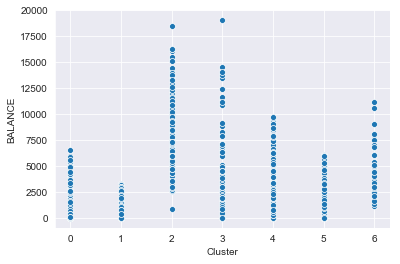

In [21]:
sns.scatterplot(model_data['Cluster'],model_data['BALANCE'])

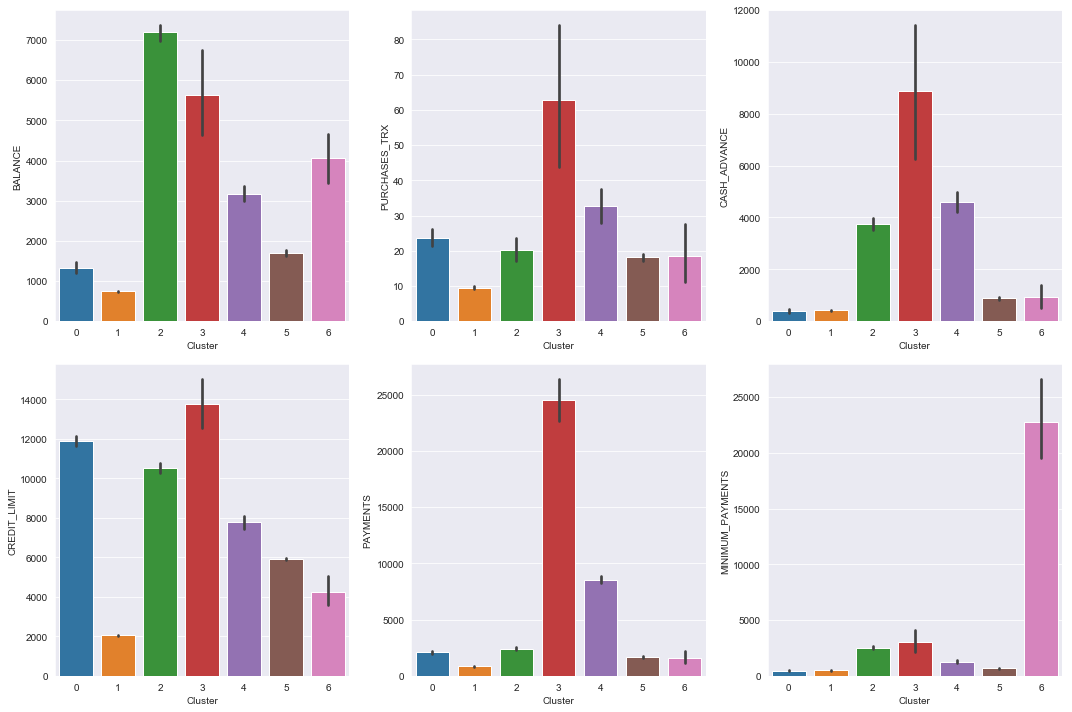

In [22]:
fig = plt.figure(figsize=(15,10))
for i in range(1,7):
    ax1 = fig.add_subplot(2,3,i)
    sns.barplot('Cluster',cols[i-1], data=model_data);

plt.tight_layout()

## Interpretation of clusters

- **Cluster0** People with low Balance & Credit limit who are resistant in doing transactions and don't spend much money.

- **Cluster1** People with high Balance & Credit limit who transact very frequently. These people opt for more Cash Advance as well which is the reason for high Balance.

- **Cluster2** People with low Balance & average Credit limit, can be termed as average spenders.  

- **Cluster3** People with average Balance & Credit limit, with average number of transactions. These people opt for average Cash Advance.

- **Cluster4** People with more than above average Balance & low Credit limit. These people opt for small amount of payments while transacting.

- **Cluster5** People with high Balance & Credit limit but do not transact very frequently. These people opt for low Cash Advance, can be termed as people prefering savings.

- **Cluster6** People with high credit limit and low Balance who make average number of transactions. They don't prefer Cash Advance frequently.